##  Spread Pattern and Behaviour Analysis of Covid-19


## Import Data and Check for Null Values, Column Info, and Descriptive Statistics

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
file_path = 'COVID-19 Daily.xlsx'
data = pd.read_excel(file_path)

null_values = data.isnull().sum()

column_info = data.info()

descriptive_stats = data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              188 non-null    datetime64[ns]
 1   Daily Tests       175 non-null    float64       
 2   Daily Cases       177 non-null    float64       
 3   Daily Recoveries  173 non-null    float64       
 4   Daily Deaths      131 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.5 KB


##  Q: How many total tests were performed till September 01, 2020?

In [12]:
# Filter data
data_filtered = data[data['Date'] <= "2020-09-01"]

# Total Tests Performed
total_tests = data_filtered['Daily Tests'].sum()
print(f"Total Tests Performed till September 01, 2020: {total_tests}")

Total Tests Performed till September 01, 2020: 2612277.0


##  Q: Perform Daily Testing Trend Line Graph, Scattered Diagram and Bar Graph.

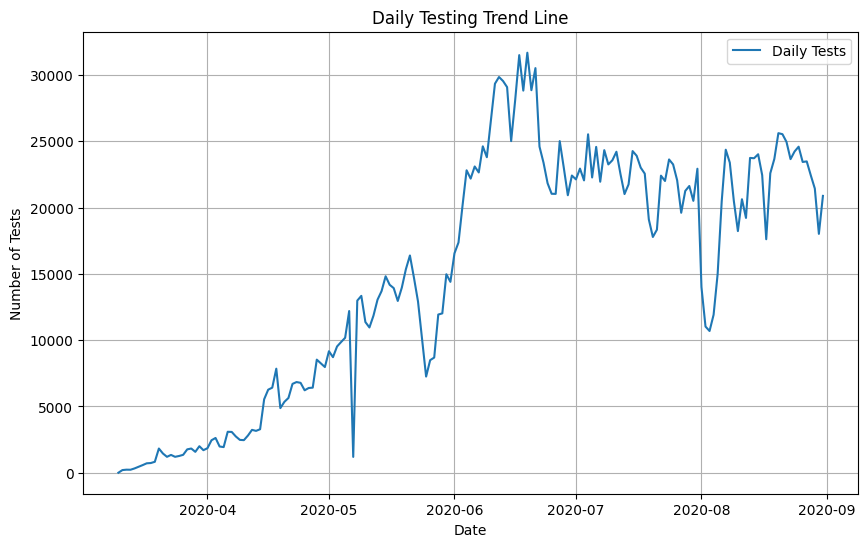

In [13]:
# 2. Daily Testing Trend Line Graph
plt.figure(figsize=(10, 6))
plt.plot(data_filtered['Date'], data_filtered['Daily Tests'], label="Daily Tests")
plt.title("Daily Testing Trend Line")
plt.xlabel("Date")
plt.ylabel("Number of Tests")
plt.grid(True)
plt.legend()
plt.show()

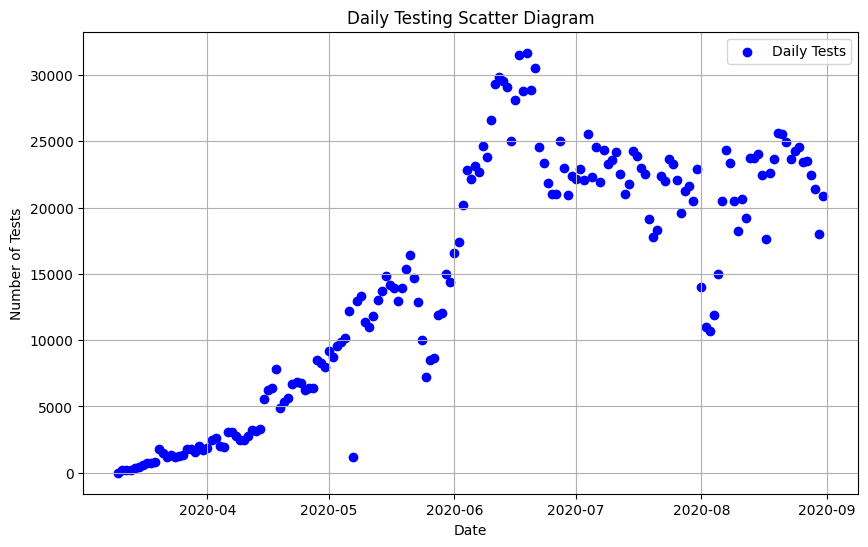

In [14]:
# 3. Scatter Diagram
plt.figure(figsize=(10, 6))
plt.scatter(data_filtered['Date'], data_filtered['Daily Tests'], color='blue', label="Daily Tests")
plt.title("Daily Testing Scatter Diagram")
plt.xlabel("Date")
plt.ylabel("Number of Tests")
plt.grid(True)
plt.legend()
plt.show()

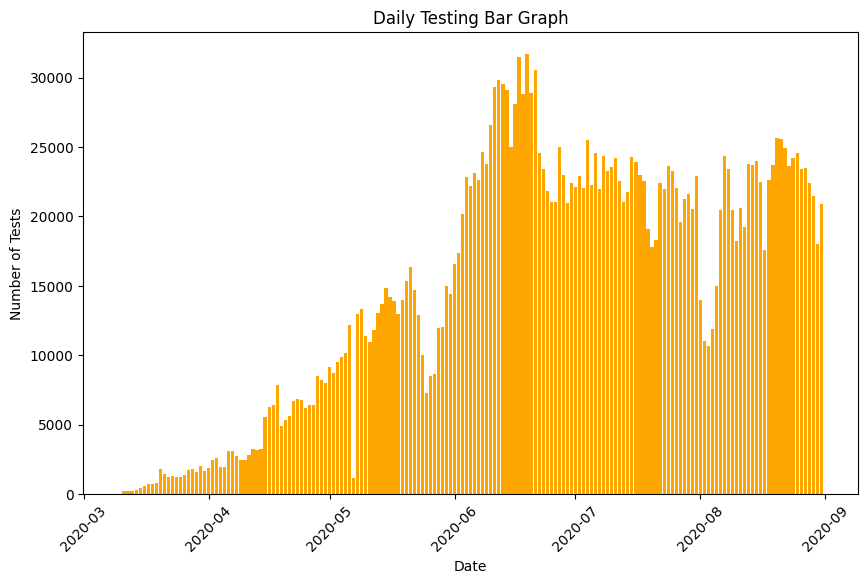

In [15]:
# 4. Bar Graph
plt.figure(figsize=(10, 6))
plt.bar(data_filtered['Date'], data_filtered['Daily Tests'], color='orange')
plt.title("Daily Testing Bar Graph")
plt.xlabel("Date")
plt.ylabel("Number of Tests")
plt.xticks(rotation=45)
plt.show()

##  Q: Show Scatter diagram of above-average(red color) and below-average(green color) daily testing.

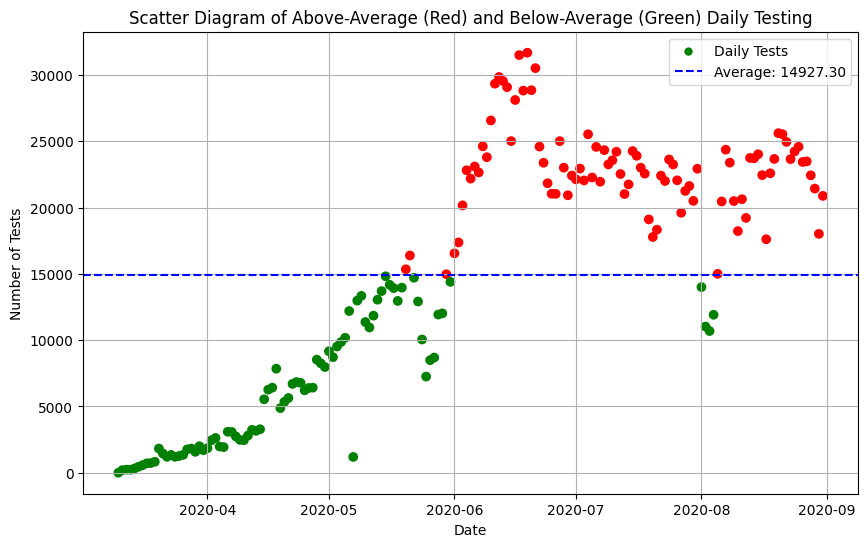

In [16]:
average_tests = data_filtered['Daily Tests'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(
    data_filtered['Date'], data_filtered['Daily Tests'], 
    color=['red' if x > average_tests else 'green' for x in data_filtered['Daily Tests']],
    label="Daily Tests"
)
plt.title("Scatter Diagram of Above-Average (Red) and Below-Average (Green) Daily Testing")
plt.xlabel("Date")
plt.ylabel("Number of Tests")
plt.grid(True)
plt.axhline(y=average_tests, color='blue', linestyle='--', label=f'Average: {average_tests:.2f}')
plt.legend()
plt.show()

##  Finding max and min number of weekly & monthly tests, cases,recoveries and deaths with dates

In [20]:
# Resampling the data to weekly and monthly statistics
weekly_data = data.resample('W-Mon', on='Date').sum().reset_index().sort_values(by='Date')
monthly_data = data.resample('M', on='Date').sum().reset_index().sort_values(by='Date')

# Weekly Stats
max_weekly_tests = weekly_data['Daily Tests'].max()
min_weekly_tests = weekly_data['Daily Tests'].min()
max_weekly_tests_date = weekly_data.loc[weekly_data['Daily Tests'].idxmax(), 'Date']
min_weekly_tests_date = weekly_data.loc[weekly_data['Daily Tests'].idxmin(), 'Date']

# Monthly Stats
max_monthly_tests = monthly_data['Daily Tests'].max()
min_monthly_tests = monthly_data['Daily Tests'].min()
max_monthly_tests_date = monthly_data.loc[monthly_data['Daily Tests'].idxmax(), 'Date']
min_monthly_tests_date = monthly_data.loc[monthly_data['Daily Tests'].idxmin(), 'Date']

print(f"Max Weekly Tests: {max_weekly_tests} on {max_weekly_tests_date}")
print(f"Min Weekly Tests: {min_weekly_tests} on {min_weekly_tests_date}")
print(f"Max Monthly Tests: {max_monthly_tests} on {max_monthly_tests_date}")
print(f"Min Monthly Tests: {min_monthly_tests} on {min_monthly_tests_date}")

Max Weekly Tests: 204096.0 on 2020-06-22 00:00:00
Min Weekly Tests: 0.0 on 2020-03-02 00:00:00
Max Monthly Tests: 745419.0 on 2020-06-30 00:00:00
Min Monthly Tests: 0.0 on 2020-02-29 00:00:00


## Line Graph, Scattered Diagram and Bar Graph for New COVID19 Tests

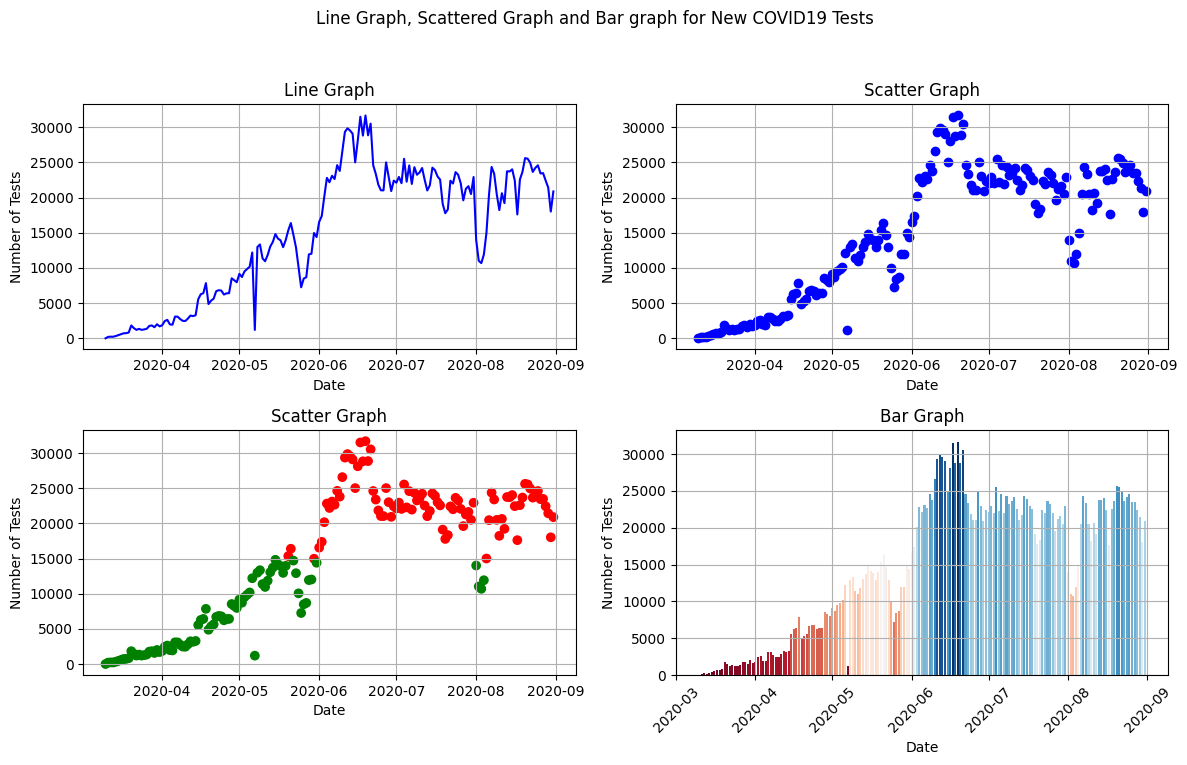

In [25]:
average_tests = data_filtered['Daily Tests'].mean()

# Line Graph
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(data_filtered['Date'], data_filtered['Daily Tests'], color='blue')
plt.title("Line Graph")
plt.xlabel("Date")
plt.ylabel("Number of Tests")
plt.grid(True)

# Scatter Graph
plt.subplot(2, 2, 2)
plt.scatter(data_filtered['Date'], data_filtered['Daily Tests'], color='blue')
plt.title("Scatter Graph")
plt.xlabel("Date")
plt.ylabel("Number of Tests")
plt.grid(True)

# Scatter Graph (Above-Average in Red, Below-Average in Green)
plt.subplot(2, 2, 3)
colors = np.where(data_filtered['Daily Tests'] > average_tests, 'red', 'green')
plt.scatter(data_filtered['Date'], data_filtered['Daily Tests'], c=colors)
plt.title("Scatter Graph")
plt.xlabel("Date")
plt.ylabel("Number of Tests")
plt.grid(True)

# Bar Graph
plt.subplot(2, 2, 4)
plt.bar(data_filtered['Date'], data_filtered['Daily Tests'], color=plt.cm.RdBu(data_filtered['Daily Tests'] / float(data_filtered['Daily Tests'].max())))
plt.title("Bar Graph")
plt.xlabel("Date")
plt.ylabel("Number of Tests")
plt.xticks(rotation=45)
plt.grid(True)

plt.suptitle("Line Graph, Scattered Graph and Bar graph for New COVID19 Tests")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Line Graph, Scattered Diagram and Bar Graph for New COVID19 Cases

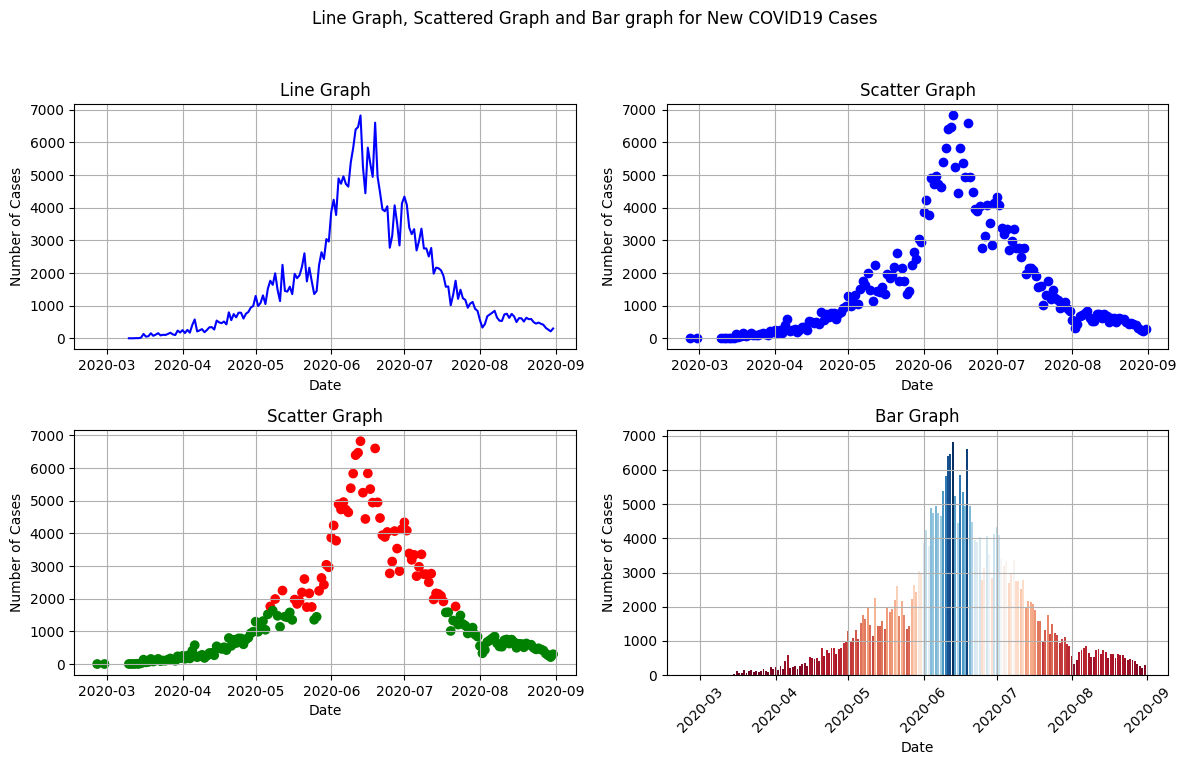

In [27]:
average_cases = data_filtered['Daily Cases'].mean()

# Line Graph for Daily Cases
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(data_filtered['Date'], data_filtered['Daily Cases'], color='blue')
plt.title("Line Graph")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.grid(True)

# Scatter Graph for Daily Cases
plt.subplot(2, 2, 2)
plt.scatter(data_filtered['Date'], data_filtered['Daily Cases'], color='blue')
plt.title("Scatter Graph")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.grid(True)

# Scatter Graph (Above-Average in Red, Below-Average in Green)
plt.subplot(2, 2, 3)
colors = np.where(data_filtered['Daily Cases'] > average_cases, 'red', 'green')
plt.scatter(data_filtered['Date'], data_filtered['Daily Cases'], c=colors)
plt.title("Scatter Graph")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.grid(True)

# Bar Graph for Daily Cases
plt.subplot(2, 2, 4)
plt.bar(data_filtered['Date'], data_filtered['Daily Cases'], color=plt.cm.RdBu(data_filtered['Daily Cases'] / float(data_filtered['Daily Cases'].max())))
plt.title("Bar Graph")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.grid(True)

plt.suptitle("Line Graph, Scattered Graph and Bar graph for New COVID19 Cases")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Line Graph, Scattered Diagram and Bar Graph for New COVID19 Daily Recoveries

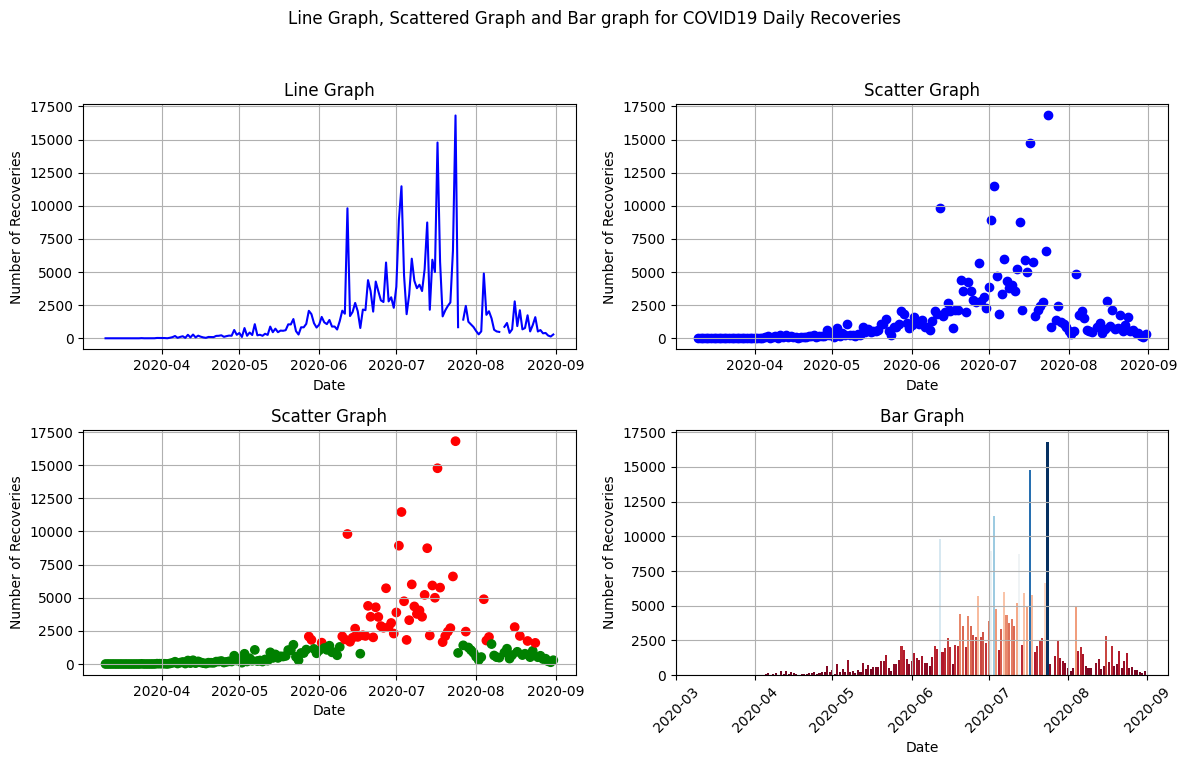

In [29]:
average_recoveries = data_filtered['Daily Recoveries'].mean()

# Line Graph for Daily Recoveries
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(data_filtered['Date'], data_filtered['Daily Recoveries'], color='blue')
plt.title("Line Graph")
plt.xlabel("Date")
plt.ylabel("Number of Recoveries")
plt.grid(True)

# Scatter Graph for Daily Recoveries
plt.subplot(2, 2, 2)
plt.scatter(data_filtered['Date'], data_filtered['Daily Recoveries'], color='blue')
plt.title("Scatter Graph")
plt.xlabel("Date")
plt.ylabel("Number of Recoveries")
plt.grid(True)

# Scatter Graph (Above-Average in Red, Below-Average in Green)
plt.subplot(2, 2, 3)
colors = np.where(data_filtered['Daily Recoveries'] > average_recoveries, 'red', 'green')
plt.scatter(data_filtered['Date'], data_filtered['Daily Recoveries'], c=colors)
plt.title("Scatter Graph")
plt.xlabel("Date")
plt.ylabel("Number of Recoveries")
plt.grid(True)

# Bar Graph for Daily Recoveries
plt.subplot(2, 2, 4)
plt.bar(data_filtered['Date'], data_filtered['Daily Recoveries'], color=plt.cm.RdBu(data_filtered['Daily Recoveries'] / float(data_filtered['Daily Recoveries'].max())))
plt.title("Bar Graph")
plt.xlabel("Date")
plt.ylabel("Number of Recoveries")
plt.xticks(rotation=45)
plt.grid(True)

plt.suptitle("Line Graph, Scattered Graph and Bar graph for COVID19 Daily Recoveries")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [31]:
# Total population 
total_population = 1000000  

# Aggregate the data by month
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.to_period('M')
monthly_data = data.groupby(data['Month']).agg({
    'Daily Tests': 'sum',
    'Daily Cases': 'sum',
    'Daily Recoveries': 'sum',
    'Daily Deaths': 'sum'
}).reset_index()

##  Q: Calculate Per Thousand & Million stats for Daily tests, cases, recoveries and deaths.

In [33]:
# Calculate Cases per Thousand and Cases per Million
monthly_data['Cases Per Thousand'] = (monthly_data['Daily Cases'] / total_population) * 1000
monthly_data['Cases Per Million'] = (monthly_data['Daily Cases'] / total_population) * 1000000

# Calculate Positive Rate (confirmed cases / total tests * 100)
monthly_data['Positive Rate'] = (monthly_data['Daily Cases'] / monthly_data['Daily Tests']) * 100

# Repeat the calculation for Recoveries and Deaths
monthly_data['Recoveries Per Thousand'] = (monthly_data['Daily Recoveries'] / total_population) * 1000
monthly_data['Recoveries Per Million'] = (monthly_data['Daily Recoveries'] / total_population) * 1000000

monthly_data['Deaths Per Thousand'] = (monthly_data['Daily Deaths'] / total_population) * 1000
monthly_data['Deaths Per Million'] = (monthly_data['Daily Deaths'] / total_population) * 1000000

print(monthly_data[['Month', 'Daily Tests', 'Daily Cases', 'Cases Per Thousand', 'Cases Per Million', 'Positive Rate']])
print(monthly_data[['Month', 'Daily Recoveries', 'Recoveries Per Thousand', 'Recoveries Per Million']])
print(monthly_data[['Month', 'Daily Deaths', 'Deaths Per Thousand', 'Deaths Per Million']])

     Month  Daily Tests  Daily Cases  Cases Per Thousand  Cases Per Million  \
0  2020-02          0.0          0.0               0.000                0.0   
1  2020-03      22763.0       2021.0               2.021             2021.0   
2  2020-04     143163.0      14778.0              14.778            14778.0   
3  2020-05     365062.0      55638.0              55.638            55638.0   
4  2020-06     745419.0     141010.0             141.010           141010.0   
5  2020-07     690360.0      65676.0              65.676            65676.0   
6  2020-08     645510.0      17003.0              17.003            17003.0   

   Positive Rate  
0            NaN  
1       8.878443  
2      10.322500  
3      15.240699  
4      18.916878  
5       9.513297  
6       2.634041  
     Month  Daily Recoveries  Recoveries Per Thousand  Recoveries Per Million
0  2020-02               0.0                    0.000                     0.0
1  2020-03              82.0                    0.082      

## Training and implement ML models to predict the future trend of daily cases and deaths

## Linear Regression

In [ ]:
# Preparing data for Linear Regression
data['Day'] = (data['Date'] - data['Date'].min()).dt.days
X = data[['Day']]
y_cases = data['Daily Cases'].fillna(0) 
y_deaths = data['Daily Deaths'].fillna(0) 

# Split the data into training and testing sets
X_train, X_test, y_cases_train, y_cases_test = train_test_split(X, y_cases, test_size=0.2, shuffle=False)
X_train, X_test, y_deaths_train, y_deaths_test = train_test_split(X, y_deaths, test_size=0.2, shuffle=False)


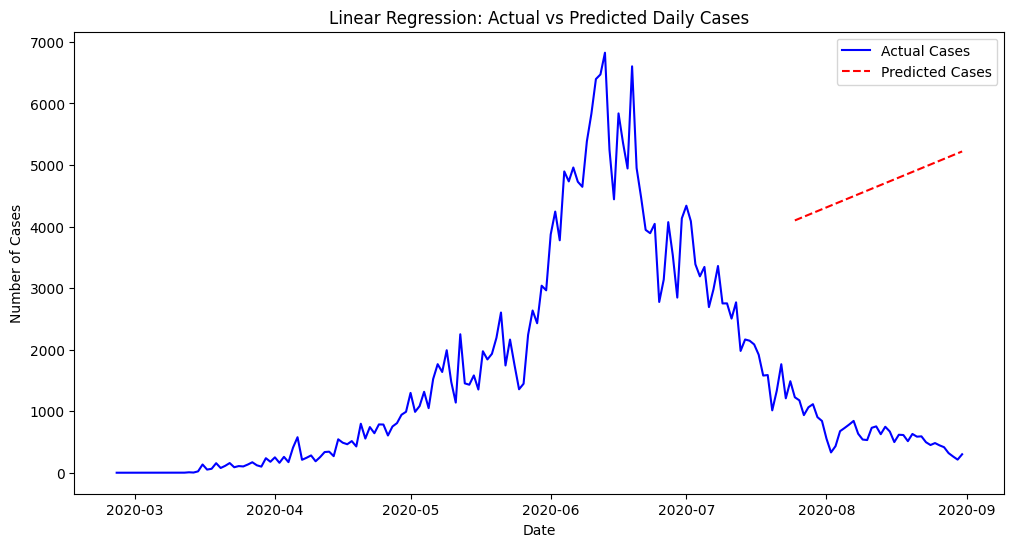

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Spliting data into training and testing sets
X_train, X_test, y_cases_train, y_cases_test = train_test_split(X, y_cases, test_size=0.2, shuffle=False)
X_train, X_test, y_deaths_train, y_deaths_test = train_test_split(X, y_deaths, test_size=0.2, shuffle=False)

# Training Linear Regression model for cases
lr_cases = LinearRegression()
lr_cases.fit(X_train, y_cases_train)

# Predicting future cases
y_cases_pred = lr_cases.predict(X_test)

# Training Linear Regression model for deaths
lr_deaths = LinearRegression()
lr_deaths.fit(X_train, y_deaths_train)

# Predicting future deaths
y_deaths_pred = lr_deaths.predict(X_test)

# Ploting predictions vs actual data for cases
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], y_cases, label="Actual Cases", color='blue')
plt.plot(data['Date'].iloc[-len(X_test):], y_cases_pred, label="Predicted Cases", color='red', linestyle='dashed')
plt.title("Linear Regression: Actual vs Predicted Daily Cases")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()

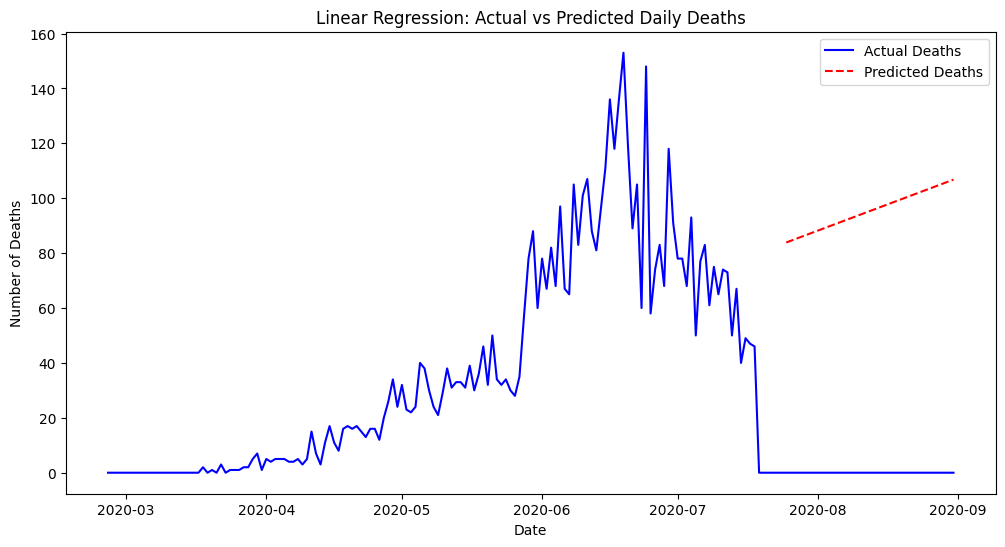

In [41]:
# Ploting predictions vs actual data for deaths
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], y_deaths, label="Actual Deaths", color='blue')
plt.plot(data['Date'].iloc[-len(X_test):], y_deaths_pred, label="Predicted Deaths", color='red', linestyle='dashed')
plt.title("Linear Regression: Actual vs Predicted Daily Deaths")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.legend()
plt.show()

In [42]:
# Calculating RMSE for cases and deaths
rmse_cases = np.sqrt(mean_squared_error(y_cases_test, y_cases_pred))
rmse_deaths = np.sqrt(mean_squared_error(y_deaths_test, y_deaths_pred))
print(f"RMSE for Cases: {rmse_cases}")
print(f"RMSE for Deaths: {rmse_deaths}")

RMSE for Cases: 4058.7188512055855
RMSE for Deaths: 95.56431479904799


##  ML Model (AutoRegressive Integrated Moving Average)


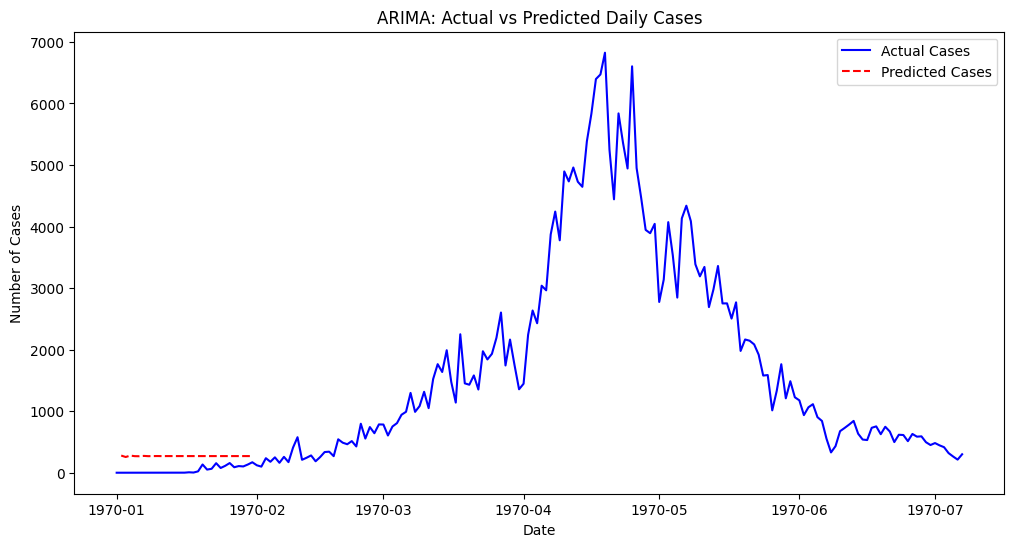

In [47]:
from statsmodels.tsa.arima.model import ARIMA

# Fill missing values with 0 for simplicity
data['Daily Cases'] = data['Daily Cases'].fillna(0)
data['Daily Deaths'] = data['Daily Deaths'].fillna(0)

# Train ARIMA model for daily cases
model_cases = ARIMA(data['Daily Cases'], order=(5, 1, 0))
model_cases_fit = model_cases.fit()

# Forecast future cases
forecast_cases = model_cases_fit.forecast(steps=30)

# Train ARIMA model for daily deaths
model_deaths = ARIMA(data['Daily Deaths'], order=(5, 1, 0))
model_deaths_fit = model_deaths.fit()

# Forecast future deaths
forecast_deaths = model_deaths_fit.forecast(steps=30)

# Plot the predictions vs actual data for cases
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Daily Cases'], label="Actual Cases", color='blue')
plt.plot(pd.date_range(start=data.index[-1], periods=31, freq='D')[1:], forecast_cases, label="Predicted Cases", color='red', linestyle='dashed')
plt.title("ARIMA: Actual vs Predicted Daily Cases")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()

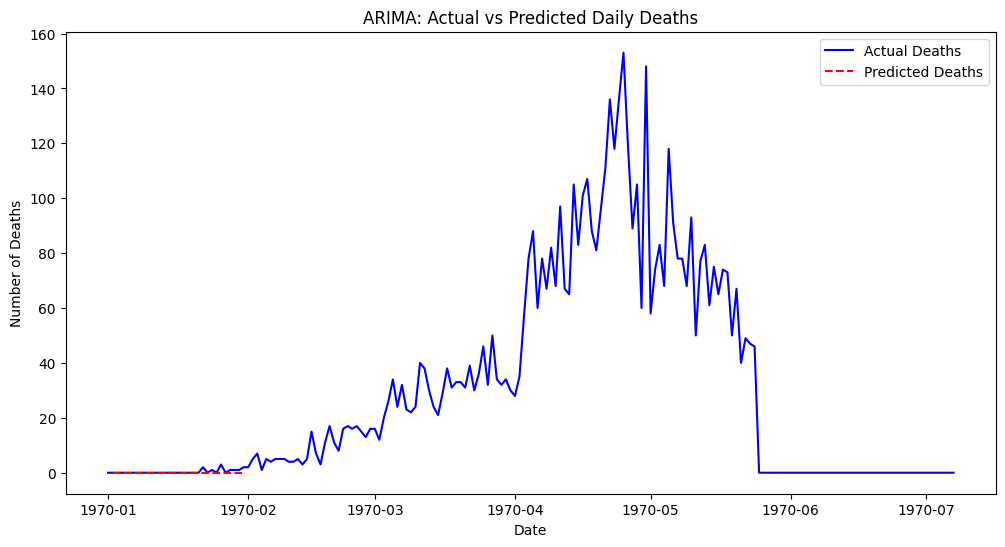

In [48]:
# Plot the predictions vs actual data for deaths
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Daily Deaths'], label="Actual Deaths", color='blue')
plt.plot(pd.date_range(start=data.index[-1], periods=31, freq='D')[1:], forecast_deaths, label="Predicted Deaths", color='red', linestyle='dashed')
plt.title("ARIMA: Actual vs Predicted Daily Deaths")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.legend()
plt.show()